In [3]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [4]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [5]:
global_model = GlobalDistribution.load(model_path)

In [6]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

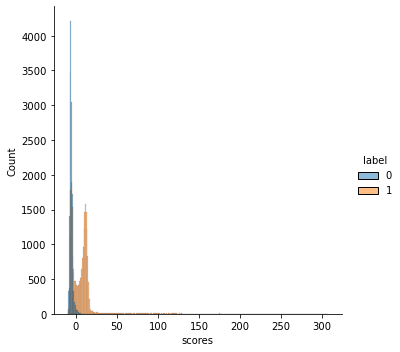

In [7]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [8]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [9]:
decoy_values[0] / decoy_values[1]

0.01054323368691739

In [10]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [11]:
function_check

,label,scores,type
0,-11.176222,0.000000,Target
1,-10.856914,0.000000,Target
2,-10.537605,0.000007,Target
3,-10.218297,0.000103,Target
4,-9.898989,0.000238,Target
...,...,...,...
995,306.535450,0.000000,Target
996,306.854758,0.000000,Target
997,307.174067,0.000000,Target
998,307.493375,0.000035,Target


In [12]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

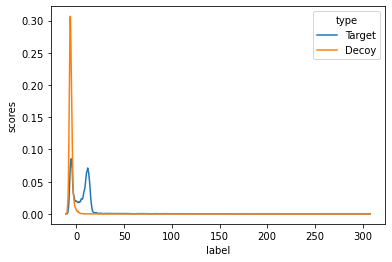

In [13]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [14]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.        , 0.        , 0.        , ..., 0.00404619, 0.00062597,
       0.00999315])